# Clustering
In general a grouping of objects such that the objects in a group (cluster) are similar (or related) to one another and different from (or unrelated to) the objects in other groups

## Types of Clustering :
1. Partional
2. Heirarchical
3. Density Based

# K Means

It is Partitional clustering approach where each cluster is associated with a centroid (center point), Each point is assigned to the cluster with the closest centroid.
Number of clusters, K, is a Hyperparameter which we must specified.
Thus The objective is to minimize the sum of distances of the points to their respective centroid

# Optimization Problem

Given a set X of n points in a d-dimensional space and an integer K , Which group the points into K clusters 
$C = \{C_1, C_2,...,C_k \}$ such that 

$\large Cost(C) = \large\sum_{i = 1}^K \sum_{x \epsilon C_i} (x - c_i)^2$

is minimized, where $\large c_i$ is the centroid of the points in cluster $\large C_i$

finding the solution to the aforementioned optimization problem in polynomial time is not possible, there we approximate it by using Lloyd’s algorithm.

# Procedure For K Means

__Step 1:__ random selection of centroids

__Step 2:__ calculate distance to each point and assign each point to cluster

__Step 3:__ calculate average of the assigned points and

__Step 4:__ move centroids to the new position

__Step 5:__ Steps 2-4 until cluster assignment is not changed

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
sns.set_theme(style="white", palette=None)
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
dataset=pd.read_csv('Mall_Customers.csv', index_col=False)
dataset.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [302]:
X = dataset.iloc[:, [3, 4]].values

In [303]:
def kmeans (K, n_itr, dataset) :
    output={}
    Centroids=[]
    X = dataset
    m=X.shape[0] 
    n=X.shape[1] 
    for i in range (K) : 
        rand=random.randint(0, m-1)
        Centroids.append(X[rand])
        
    Centroids = np.array(Centroids).T
    for i in range(n_iter):
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)+1
        Y={}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(2,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]

        for k in range(K):
            Y[k+1]=Y[k+1].T

        for k in range(K):
            Centroids[:,k]=np.mean(Y[k+1],axis=0)
        output=Y
    return Centroids, output

In [306]:
centroids, output = kmeans(5, 100, X)

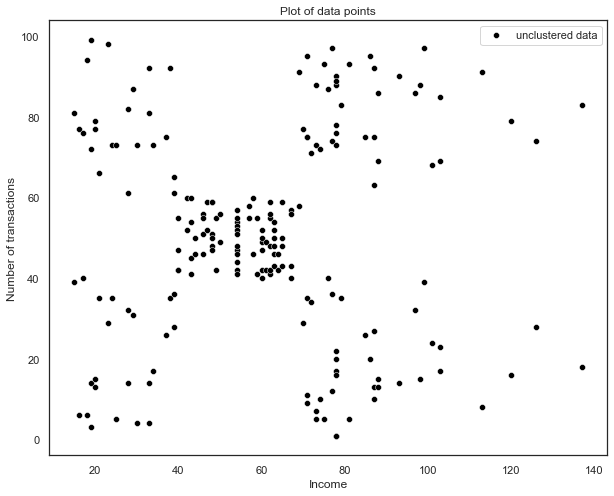

In [307]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.scatterplot(x=X[:,0],y=X[:,1],color='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

In [308]:
def plot(Centroids,Output, K) :
    labels=[]
    for i in range (K):
        s = f'cluster{i+1}'
        labels.append(s)
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    color=sns.color_palette(None, K)
    for k in range(K):
        sns.scatterplot(x=Output[k+1][:,0], y=Output[k+1][:,1],color=color[k],label=labels[k])
    sns.scatterplot(x=Centroids[0,:],y=Centroids[1,:],s=200,color='black',label='Centroids', marker='^')
    plt.xlabel('Income')
    plt.ylabel('Number of transactions')
    plt.legend()
    plt.show()

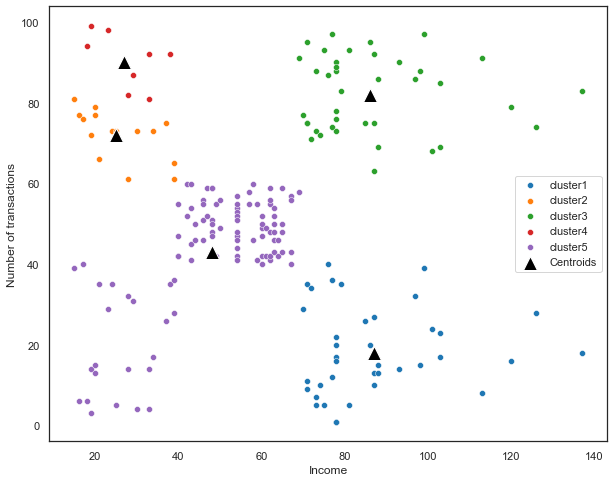

In [309]:
plot(centroids, output, 5)

# Kmeans with Different Values of K

In [313]:
centroids_for_different_k = []
clusters_for_different_k = []
for i in range (1, 11) : 
    Centroids, Clusters = kmeans(i, 310, X)
    centroids_for_different_k.append(Centroids)
    clusters_for_different_k.append(Clusters)

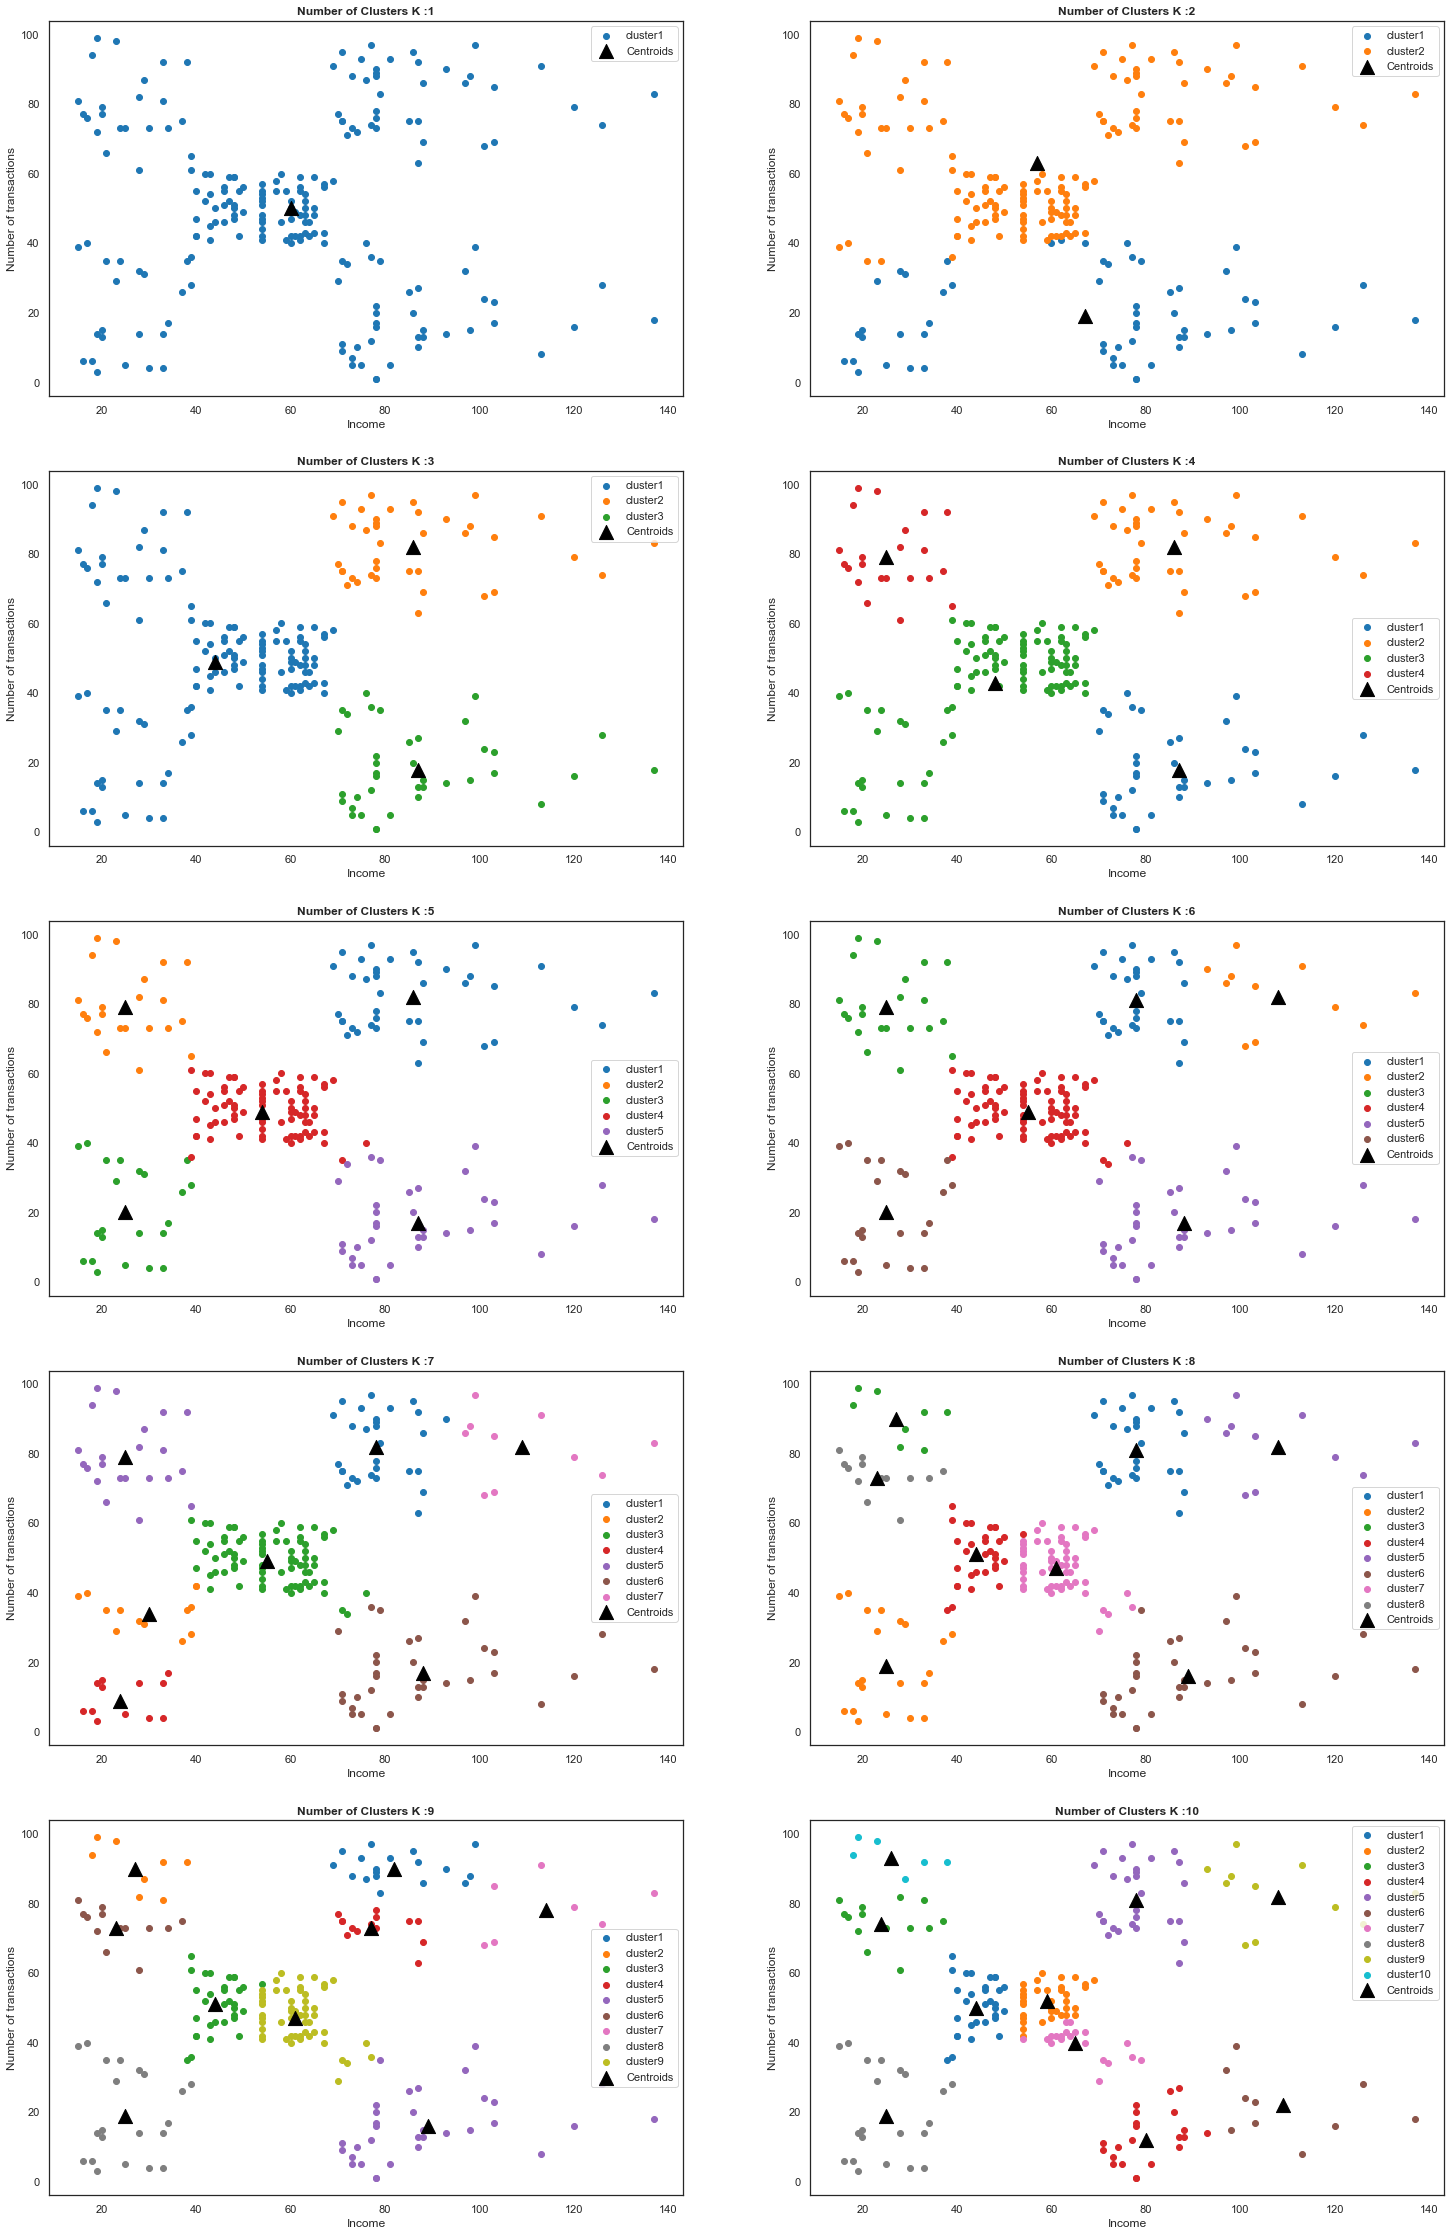

In [314]:
fig, ax = plt.subplots(5, 2, figsize=(25, 40))
k = 0;
for i in range (0, 5):
    for j in range (0, 2):
        labels=[]
        for z in range (k+1):
            s = f'cluster{z+1}'
            labels.append(s)
        color=sns.color_palette(None, k+1)
        for l in range(0, k+1):
            ax[i][j].scatter(x=clusters_for_different_k[k][l+1][:,0], y=clusters_for_different_k[k][l+1][:,1],color=color[l],label=labels[l])
            
        ax[i][j].scatter(x=centroids_for_different_k[k][0,:],y=centroids_for_different_k[k][1,:],s=200,color='black',label='Centroids', marker='^')
        ax[i][j].set_title(f"Number of Clusters K :{k+1}", fontweight='bold')
        ax[i][j].set_ylabel("Number of transactions")
        ax[i][j].set_xlabel( "Income")
        ax[i][j].legend()
        k=k+1

# Determining Optimal Number of Clusters

Sum of squares of distances of every data point from its corresponding cluster centroid should be as minimum as possible.
we use a method called ELBOW method to find the appropriate number of clusters. The parameter which will be taken into consideration is Sum of squares of distances of every data point from its corresponding cluster centroid which is called WCSS ( Within-Cluster Sums of Squares).
Steps involved in ELBOW method are:
- Perform K means clustering on different values of K ranging from 1 to any upper limit.
- For each K, calculate WCSS (Within Cluster Sum of Squares)
- Plot the value for WCSS with the number of clusters K.

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. i.e the point after which WCSS doesn’t decrease more rapidly is the appropriate value of K.

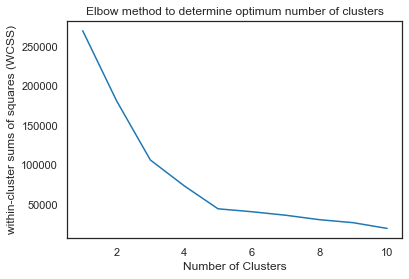

In [102]:
WCSS_array=np.array([])
for K in range(1,11):
    Centroids, Output =kmeans(K, 100)
    wcss=0
    Centroids = Centroids.T
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

# Limitations of K means

### 1. K means changes with differential cluster initialization 

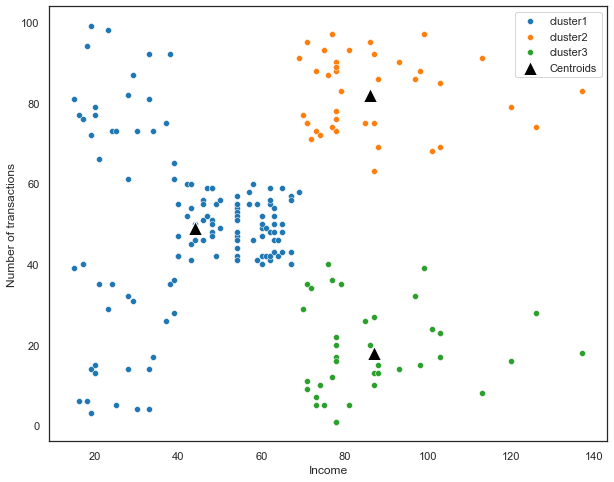

In [253]:
centroids, output = kmeans(3, 100)
plot(centroids, output, 3)

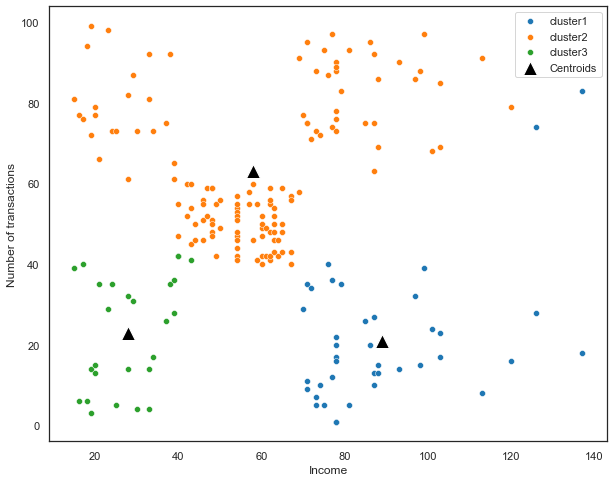

In [256]:
centroids, output = kmeans(3, 50)
plot(centroids, output, 3)

thus we get very different cluster on two different runs if we initilalize the centroids randomly.

This Problem can be solved if we select original set of points by methods other than random. E.g., pick the most distant (from each other) points as cluster centers (K-means++ algorithm)

### 2. K-means has problems when clustersare of different
 - Sizes
 - Densities
 - Non-globular shapes

In [376]:
from sklearn import cluster, datasets
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

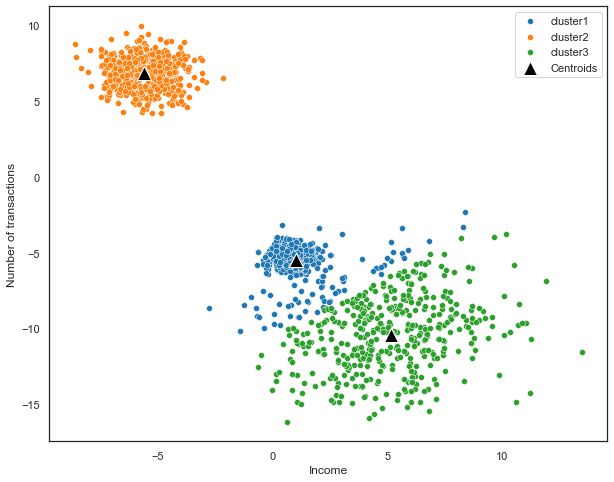

In [390]:
blobs = datasets.make_blobs( n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5])
sx, sy = blobs
df = pd.DataFrame({'x':sx[:,0], 'y':sx[:,1]}).values
cen, clu = kmeans(3, 100, df)
plot(cen, clu, 3)

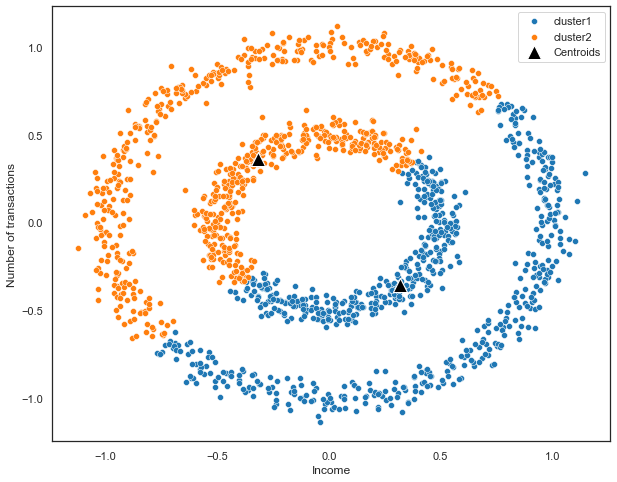

In [389]:
sx, sy = noisy_circles
df = pd.DataFrame({'x':sx[:,0], 'y':sx[:,1]}).values
cen, clu = kmeans(2, 100, df)
plot(cen, clu, 2)

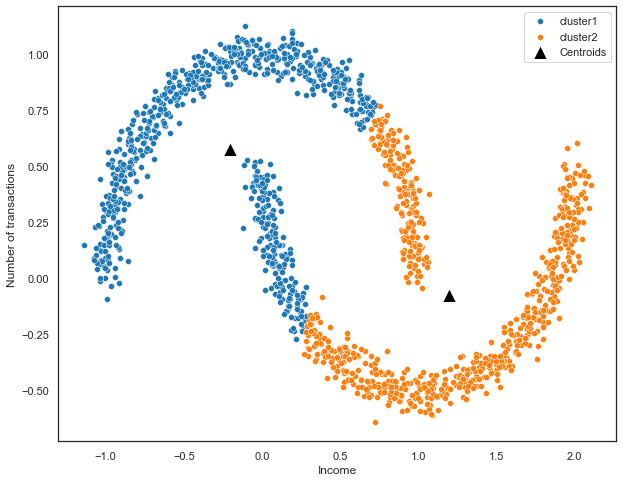

In [343]:
sx, sy = noisy_moons
df = pd.DataFrame({'x':sx[:,0], 'y':sx[:,1]}).values
cen, clu = kmeans(2, 100, df)
plot(cen, clu, 2)

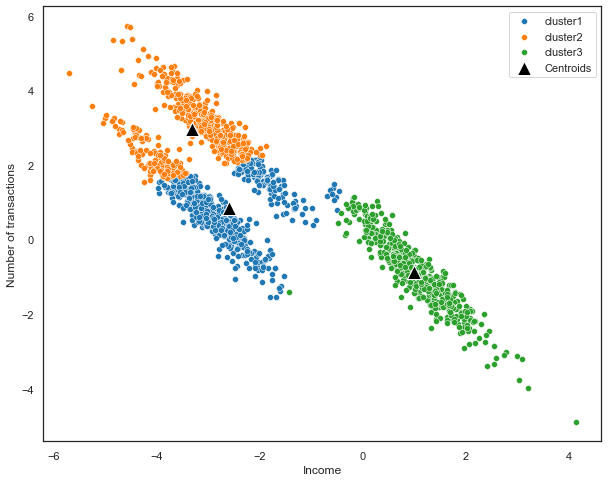

In [392]:
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
sx, sy = aniso
df = pd.DataFrame({'x':sx[:,0], 'y':sx[:,1]}).values
cen, clu = kmeans(3, 100, df)
plot(cen, clu, 3)

hierarchical clustering can be used to solve the aforementioned problems